In [1]:
!pip install plotly

In [2]:
!pip install wordcloud

In [3]:
# Librairies and functions
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("max_columns", 30)

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import folium # map rendering library

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cs
import matplotlib.colors as colors

import numpy as np

import plotly.express as px
import plotly.graph_objects as go
print('Libraries imported.')

from wordcloud import WordCloud
from PIL import Image

Libraries imported.


## A - Toronto data : 

In [4]:
#Let's first view the toronto data table using "BeautifulSoup."
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [5]:
# Beautiful object
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html5lib')
soup.title # title of page who contain data toronto

<title>List of postal codes of Canada: M - Wikipedia</title>

In [6]:
# there are three tables and the first one is the one we want on the wikipedia page, 
# which presents the data on toronto
dataframe_list = pd.read_html(url, flavor='bs4')
print("Number of dataframe : ", len(dataframe_list))

Number of dataframe :  3


### Load and explore the first part of toronto data

In [7]:
#We obtain the data of toronto with the index 0
table_data_toronto = dataframe_list[0]
table_data_toronto

0  \
0                                     M1ANot assigned   
1                     M1BScarborough(Malvern / Rouge)   
2   M1CScarborough(Rouge Hill / Port Union / Highl...   
3   M1EScarborough(Guildwood / Morningside / West ...   
4                              M1GScarborough(Woburn)   
5                           M1HScarborough(Cedarbrae)   
6                 M1JScarborough(Scarborough Village)   
7   M1KScarborough(Kennedy Park / Ionview / East B...   
8   M1LScarborough(Golden Mile / Clairlea / Oakridge)   
9   M1MScarborough(Cliffside / Cliffcrest / Scarbo...   
10       M1NScarborough(Birch Cliff / Cliffside West)   
11  M1PScarborough(Dorset Park / Wexford Heights /...   
12                 M1RScarborough(Wexford / Maryvale)   
13                          M1SScarborough(Agincourt)   
14  M1TScarborough(Clarks Corners / Tam O'Shanter ...   
15  M1VScarborough(Milliken / Agincourt North / St...   
16     M1WScarborough(Steeles West / L'Amoreaux West)   
17                        M1XScarborough(Upper Rouge)   
18                                    M1YNot assigned   
19                                    M1ZNot assigned   

                                                1  \
0                                 M2ANot assigned   
1                                 M2BNot assigned   
2                                 M2CNot assigned   
3                                 M2ENot assigned   
4                                 M2GNot assigned   
5                M2HNorth York(Hillcrest Village)   
6   M2JNorth York(Fairview / Henry Farm / Oriole)   
7                  M2KNorth York(Bayview Village)   
8        M2LNorth York(York Mills / Silver Hills)   
9         M2MNorth York(Willowdale / Newtonbrook)   
10                 M2NNorth York(Willowdale)South   
11                 M2PNorth York(York Mills West)   
12                  M2RNorth York(Willowdale)West   
13                                M2SNot assigned   
14                                M2TNot assigned   
15                                M2VNot assigned   
16                                M2WNot assigned   
17                                M2XNot assigned   
18                                M2YNot assigned   
19                                M2ZNot assigned   

                                                    2  \
0                            M3ANorth York(Parkwoods)   
1                       M3BNorth York(Don Mills)North   
2      M3CNorth York(Don Mills)South(Flemingdon Park)   
3                                     M3ENot assigned   
4                                     M3GNot assigned   
5   M3HNorth York(Bathurst Manor / Wilson Heights ...   
6     M3JNorth York(Northwood Park / York University)   
7          M3KNorth York(Downsview)East (CFB Toronto)   
8                        M3LNorth York(Downsview)West   
9                     M3MNorth York(Downsview)Central   
10                  M3NNorth York(Downsview)Northwest   
11                                    M3PNot assigned   
12                                    M3RNot assigned   
13                                    M3SNot assigned   
14                                    M3TNot assigned   
15                                    M3VNot assigned   
16                                    M3WNot assigned   
17                                    M3XNot assigned   
18                                    M3YNot assigned   
19                                    M3ZNot assigned   

                                                    3  \
0                     M4ANorth York(Victoria Village)   
1      M4BEast York(Parkview Hill / Woodbine Gardens)   
2                      M4CEast York(Woodbine Heights)   
3                        M4EEast Toronto(The Beaches)   
4                               M4GEast York(Leaside)   
5                      M4HEast York(Thorncliffe Park)   
6         M4JEast YorkEast Toronto(The Danforth East)   
7      M4KEast Toronto(The Danforth West / Riverdale)   
8    M4LEast Toronto(India Ba

In [8]:
# show dataframe columns name to displays
col = ['PostalCode', 'Borough', 'Neighborhood']
# instantiate the dataframe
df = pd.DataFrame(columns=col)
df

Empty DataFrame
Columns: [PostalCode, Borough, Neighborhood]
Index: []

In [9]:
# Now, let's creating dataframe with table_data_toronto who contain PostalCode, Borough, Neighborhood
table_data_toronto=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_data_toronto.append(cell)

# print(table_contents)
dataframe_toronto = pd.DataFrame(table_data_toronto)
dataframe_toronto['Borough']=dataframe_toronto['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [10]:
# show dataframe_toronto with PostalCode, Borough, Neighborhood
dataframe_toronto.head()

PostalCode           Borough                      Neighborhood
0        M3A        North York                         Parkwoods
1        M4A        North York                  Victoria Village
2        M5A  Downtown Toronto         Regent Park, Harbourfront
3        M6A        North York  Lawrence Manor, Lawrence Heights
4        M7A      Queen's Park     Ontario Provincial Government

### Load and explore the second part of toronto data

In [11]:
# to read geospatial coordinates csv file
geospatial_coordinates = pd.read_csv("Geospatial_Coordinates.csv")
# Sort dataframe_toronto by postalcode
dataframe_toronto = dataframe_toronto.sort_values(by = 'PostalCode')
# to show data in geospatial_coordinates
dataframe_toronto.head()

PostalCode      Borough                            Neighborhood
6         M1B  Scarborough                          Malvern, Rouge
12        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
18        M1E  Scarborough       Guildwood, Morningside, West Hill
22        M1G  Scarborough                                  Woburn
26        M1H  Scarborough                               Cedarbrae

In [12]:
# reset index in dataframe_toronto sorted to obtain the same index for postalcode in geospatial_coordinates
dataframe_toronto.reset_index(drop = True, inplace = True)
dataframe_toronto.head()

PostalCode      Borough                            Neighborhood
0        M1B  Scarborough                          Malvern, Rouge
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2        M1E  Scarborough       Guildwood, Morningside, West Hill
3        M1G  Scarborough                                  Woburn
4        M1H  Scarborough                               Cedarbrae

In [13]:
# Add geospatial_coordinates data to dataframe_toronto sorted by concat methode. Result is "toronto_coords"
toronto_data = pd.concat([dataframe_toronto, geospatial_coordinates], axis = 1)
toronto_data.drop(columns = ['Postal Code'], inplace = True)
toronto_data.head()

PostalCode      Borough                            Neighborhood   Latitude  \
0        M1B  Scarborough                          Malvern, Rouge  43.806686   
1        M1C  Scarborough  Rouge Hill, Port Union, Highland Creek  43.784535   
2        M1E  Scarborough       Guildwood, Morningside, West Hill  43.763573   
3        M1G  Scarborough                                  Woburn  43.770992   
4        M1H  Scarborough                               Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

##  B - New York data :

In [14]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json"

### Load and explore New York data

In [15]:
with open('new_york_data.json') as json_data:
    newyork_data = json.load(json_data)
    print(newyork_data)

{'type': 'FeatureCollection', 'totalFeatures': 306, 'features': [{'type': 'Feature', 'id': 'nyu_2451_34572.1', 'geometry': {'type': 'Point', 'coordinates': [-73.84720052054902, 40.89470517661]}, 'geometry_name': 'geom', 'properties': {'name': 'Wakefield', 'stacked': 1, 'annoline1': 'Wakefield', 'annoline2': None, 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.84720052054902, 40.89470517661, -73.84720052054902, 40.89470517661]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.2', 'geometry': {'type': 'Point', 'coordinates': [-73.82993910812398, 40.87429419303012]}, 'geometry_name': 'geom', 'properties': {'name': 'Co-op City', 'stacked': 2, 'annoline1': 'Co-op', 'annoline2': 'City', 'annoline3': None, 'annoangle': 0.0, 'borough': 'Bronx', 'bbox': [-73.82993910812398, 40.87429419303012, -73.82993910812398, 40.87429419303012]}}, {'type': 'Feature', 'id': 'nyu_2451_34572.3', 'geometry': {'type': 'Point', 'coordinates': [-73.82780644716412, 40.887555677350775]}, 'geometry_n

In [16]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
new_york_data = pd.DataFrame(columns=column_names)
new_york_data

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

In [17]:
# Notice how all the relevant data is in the features key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

neighborhoods_data = newyork_data['features']

# Then let's loop through the data and fill the dataframe one row at a time.

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [18]:
# Quickly examine the resulting dataframe.

new_york_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

## C - Use geopy library to get the latitude and longitude values of Toronto and NY City 

### 1- Latitude and longitude values of Toronto City

In [19]:
address = 'Toronto City, TO'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.65238435, -79.38356765.


#### Create a map of New York with neighborhoods superimposed on top.

In [20]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

### 2- Latitude and longitude values of New York City

In [21]:
# In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [22]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(new_york_data['Latitude'], new_york_data['Longitude'], new_york_data['Borough'], new_york_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

## D - Foursquare API to explore the neighborhoods

### Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = '1QWTCHDRXZH0PQVSHGF2K4PY13P5BJNYSWNSEJYJF15ZRRQ4' # your Foursquare ID
CLIENT_SECRET = '4NZ1H1JW4XLJR11ARB2XGLZQ1UWXQ2JO4VVERGL4WYHCJK0M' # your Foursquare Secret
VERSION = '20210525' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 1QWTCHDRXZH0PQVSHGF2K4PY13P5BJNYSWNSEJYJF15ZRRQ4
CLIENT_SECRET:4NZ1H1JW4XLJR11ARB2XGLZQ1UWXQ2JO4VVERGL4WYHCJK0M


### Explore and Analyse Neighborhoods : Downtown, TORONTO and  Brooklyn, NEW YORK

<< Le centre-ville de Toronto (Downtown Toronto) est le quartier d'affaires de la ville de Toronto au Canada. Il comprend le siège de nombreuses entreprises canadiennes et a une grande population résidentielle. Au cours des dernières années de nombreux grands gratte-ciel ont vu le jour dans toute la région. >> source : https://fr.wikipedia.org/wiki/Centre-ville_de_Toronto

<< Brooklyn représente a elle toute seule environ 2,5 millions d’habitants.
S’il s’agissait d’une ville indépendante, ce serait la 4ème des USA derrière NY, LOS ANGELES et Chicago.
Les années noires que la ville a connu lui donne aujourd’hui beaucoup d’intérêt !

On pourra croiser à Brooklyn de nombreux immigrés en provenance de l’Europe de l’Est, d’Afrique, d’Amérique Latine, des Caraïbes, d’Asie et du sous-continent Indien. >> source :https://we-love-new-york.com/brooklyn-ville-la-plus-peuplee-des-5-boroughs-de-new-york/

### 1- Explore and Analyse Neighborhoods : Brooklyn, NEW YORK

In [24]:
# Function to extracts the category of the venue in all of the New York neighborhoods

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
brooklyn_data = new_york_data[new_york_data['Borough'] == 'Brooklyn'].reset_index(drop=True)
brooklyn_data.head()

Borough Neighborhood   Latitude  Longitude
0  Brooklyn    Bay Ridge  40.625801 -74.030621
1  Brooklyn  Bensonhurst  40.611009 -73.995180
2  Brooklyn  Sunset Park  40.645103 -74.010316
3  Brooklyn   Greenpoint  40.730201 -73.954241
4  Brooklyn    Gravesend  40.595260 -73.973471

In [27]:
# To get all venues of neighborhoods in Brooklyn
brooklyn_venues = getNearbyVenues(names=brooklyn_data['Neighborhood'],
                                   latitudes=brooklyn_data['Latitude'],
                                   longitudes=brooklyn_data['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [28]:
print("brooklyn_venues shape", brooklyn_venues.shape)
brooklyn_venues.head()

brooklyn_venues shape (2737, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Bay Ridge              40.625801              -74.030621   
1    Bay Ridge              40.625801              -74.030621   
2    Bay Ridge              40.625801              -74.030621   
3    Bay Ridge              40.625801              -74.030621   
4    Bay Ridge              40.625801              -74.030621   

                         Venue  Venue Latitude  Venue Longitude  \
0  Pilo Arts Day Spa and Salon       40.624748       -74.030591   
1                    Bagel Boy       40.627896       -74.029335   
2                 Pegasus Cafe       40.623168       -74.031186   
3          Leo's Casa Calamari       40.624200       -74.030931   
4                Cocoa Grinder       40.623967       -74.030863   

   Venue Category  
0             Spa  
1      Bagel Shop  
2  Breakfast Spot  
3     Pizza Place  
4       Juice Bar

In [29]:
# To check how many venues were returned for each neighborhood
brooklyn_venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Bath Beach                                    40                      40   
Bay Ridge                                     82                      82   
Bedford Stuyvesant                            30                      30   
Bensonhurst                                   34                      34   
Bergen Beach                                   7                       7   
Boerum Hill                                   87                      87   
Borough Park                                  23                      23   
Brighton Beach                                42                      42   
Broadway Junction                             18                      18   
Brooklyn Heights                             100                     100   
Brownsville                                   16                      16   
Bushwick                                      67                      67   
Canarsie                                       6                       6   
Carroll Gardens                              100                     100   
City Line                                     38                      38   
Clinton Hill                                  98                      98   
Cobble Hill                                   95                      95   
Coney Island                                  13                      13   
Crown Heights                                 19                      19   
Cypress Hills                                 28                      28   
Ditmas Park                                   47                      47   
Downtown                                     100                     100   
Dumbo                                         66                      66   
Dyker Heights                                  7                       7   
East Flatbush                                 13                      13   
East New York                                 10                      10   
East Williamsburg                             64                      64   
Erasmus                                       22                      22   
Flatbush                                      19                      19   
Flatlands                                     15                      15   
Fort Greene                                   69                      69   
Fort Hamilton                                 62                      62   
Fulton Ferry                                  59                      59   
Georgetown                                    29                      29   
Gerritsen Beach                               22                      22   
Gowanus                                       62                      62   
Gravesend                                     28                      28   
Greenpoint                                   100                     100   
Highland Park                                 13                      13   
Homecrest                                     40                      40   
Kensington                                    33                      33   
Madison                                       10                      10   
Manhattan Beach                               10                      10   
Manhattan Terrace                             24                      24   
Marine Park                                   11                      11   
Midwood                                       12                      12   
Mill Basin                                    36                      36   
Mill Island                                    2                       2   
New Lots                                      16                      16   
North Side                                   100                     100   
Ocean Hill                                    25                      25   

In [30]:
# To find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(brooklyn_venues['Venue Category'].unique())))

There are 295 uniques categories.


#### Analyze Each Neighborhood in Brooklyn


In [31]:
# one hot encoding
brooklyn_onehot = pd.get_dummies(brooklyn_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
brooklyn_onehot['Neighborhood'] = brooklyn_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [brooklyn_onehot.columns[-1]] + list(brooklyn_onehot.columns[:-1])
brooklyn_onehot = brooklyn_onehot[fixed_columns]

brooklyn_onehot.head()

Yoga Studio  Accessories Store  American Restaurant  Antique Shop  \
0            0                  0                    0             0   
1            0                  0                    0             0   
2            0                  0                    0             0   
3            0                  0                    0             0   
4            0                  0                    0             0   

   Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0                 0                       0            0           0   
1                 0                       0            0           0   
2                 0                       0            0           0   
3                 0                       0            0           0   
4                 0                       0            0           0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                    0                     0                 0   
1                    0                     0                 0   
2                    0                     0                 0   
3                    0                     0                 0   
4                    0                     0                 0   

   Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  ...  Turkish Restaurant  \
0                   0          0           0       0  ...                   0   
1                   0          0           1       0  ...                   0   
2                   0          0           0       0  ...                   0   
3                   0          0           0       0  ...                   0   
4                   0          0           0       0  ...                   0   

   Used Bookstore  Vape Store  Varenyky restaurant  \
0               0           0                    0   
1               0           0                    0   
2               0           0                    0   
3               0           0                    0   
4               0           0                    0   

   Vegetarian / Vegan Restaurant  Video Game Store  Video Store  \
0                              0                 0            0   
1                              0                 0            0   
2                              0                 0            0   
3                              0                 0            0   
4                              0                 0            0   

   Vietnamese Restaurant  Waterfront  Whisky Bar  Wine Bar  Wine Shop  \
0                      0           0           0         0          0   
1                      0           0           0         0          0   
2                      0           0           0         0          0   
3                      0           0           0         0          0   
4                      0           0           0         0          0   

   Wings Joint  Women's Store  Yemeni Restaurant  
0            0              0                  0  
1            0              0                  0  
2            0              0                  0  
3            0              0                  0  
4            0              0                  0  

[5 rows x 295 columns]

In [32]:
brooklyn_onehot.shape

(2737, 295)

In [33]:
# To group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
brooklyn_venues_grouped_neigh = brooklyn_onehot.groupby('Neighborhood').mean().reset_index()
brooklyn_venues_grouped_neigh.head()

Neighborhood  Yoga Studio  Accessories Store  American Restaurant  \
0          Bath Beach          0.0                0.0             0.000000   
1           Bay Ridge          0.0                0.0             0.036585   
2  Bedford Stuyvesant          0.0                0.0             0.000000   
3         Bensonhurst          0.0                0.0             0.000000   
4        Bergen Beach          0.0                0.0             0.000000   

   Antique Shop  Arepa Restaurant  Argentinian Restaurant  Art Gallery  \
0           0.0               0.0                     0.0          0.0   
1           0.0               0.0                     0.0          0.0   
2           0.0               0.0                     0.0          0.0   
3           0.0               0.0                     0.0          0.0   
4           0.0               0.0                     0.0          0.0   

   Art Museum  Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0         0.0             0.000000                   0.0             0.025   
1         0.0             0.012195                   0.0             0.000   
2         0.0             0.000000                   0.0             0.000   
3         0.0             0.000000                   0.0             0.000   
4         0.0             0.000000                   0.0             0.000   

   Athletics & Sports  BBQ Joint  Bagel Shop  ...  Turkish Restaurant  \
0            0.000000        0.0    0.000000  ...               0.025   
1            0.000000        0.0    0.048780  ...               0.000   
2            0.000000        0.0    0.033333  ...               0.000   
3            0.000000        0.0    0.029412  ...               0.000   
4            0.142857        0.0    0.000000  ...               0.000   

   Used Bookstore  Vape Store  Varenyky restaurant  \
0             0.0         0.0                  0.0   
1             0.0         0.0                  0.0   
2             0.0         0.0                  0.0   
3             0.0         0.0                  0.0   
4             0.0         0.0                  0.0   

   Vegetarian / Vegan Restaurant  Video Game Store  Video Store  \
0                            0.0          0.025000        0.025   
1                            0.0          0.012195        0.000   
2                            0.0          0.000000        0.000   
3                            0.0          0.000000        0.000   
4                            0.0          0.000000        0.000   

   Vietnamese Restaurant  Waterfront  Whisky Bar  Wine Bar  Wine Shop  \
0               0.000000         0.0         0.0  0.000000   0.000000   
1               0.012195         0.0         0.0  0.000000   0.000000   
2               0.000000         0.0         0.0  0.033333   0.033333   
3               0.000000         0.0         0.0  0.000000   0.000000   
4               0.000000         0.0         0.0  0.000000   0.000000   

   Wings Joint  Women's Store  Yemeni Restaurant  
0          0.0          0.025                0.0  
1          0.0          0.000                0.0  
2          0.0          0.000                0.0  
3          0.0          0.000                0.0  
4          0.0          0.000                0.0  

[5 rows x 295 columns]

In [34]:
# To print each neighborhood along with the top 5 most common venues
num_top_venues = 50

for hood in brooklyn_venues_grouped_neigh['Neighborhood']:
    print("----"+hood+"----")
    temp = brooklyn_venues_grouped_neigh[brooklyn_venues_grouped_neigh['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bath Beach----
                    venue  freq
0      Chinese Restaurant  0.08
1    Fast Food Restaurant  0.05
2             Gas Station  0.05
3              Donut Shop  0.05
4      Italian Restaurant  0.05
5                Pharmacy  0.05
6         Bubble Tea Shop  0.05
7        Sushi Restaurant  0.05
8       Mobile Phone Shop  0.02
9              Hookah Bar  0.02
10    Peruvian Restaurant  0.02
11         Sandwich Place  0.02
12                   Park  0.02
13             Restaurant  0.02
14              Surf Spot  0.02
15           Dessert Shop  0.02
16           Burger Joint  0.02
17         Clothing Store  0.02
18      German Restaurant  0.02
19            Coffee Shop  0.02
20   Cantonese Restaurant  0.02
21     Dim Sum Restaurant  0.02
22                   Bank  0.02
23          Women's Store  0.02
24            Video Store  0.02
25       Asian Restaurant  0.02
26     Turkish Restaurant  0.02
27            Pizza Place  0.02
28                 Bakery  0.02
29       Video Game S

                            venue  freq
0       Latin American Restaurant  0.15
1          Furniture / Home Store  0.08
2                          Garden  0.08
3                            Food  0.08
4                   Metro Station  0.08
5                   Grocery Store  0.08
6                    Tennis Court  0.08
7            Gym / Fitness Center  0.08
8                     Pizza Place  0.08
9                            Park  0.08
10                  Deli / Bodega  0.08
11                 Cosmetics Shop  0.08
12                     Playground  0.00
13                           Pool  0.00
14                     Non-Profit  0.00
15                   Noodle House  0.00
16                    Opera House  0.00
17                   Optical Shop  0.00
18                      Pool Hall  0.00
19                Organic Grocery  0.00
20           Other Great Outdoors  0.00
21                Other Nightlife  0.00
22              Other Repair Shop  0.00
23                    Outdoor Gym  0.00


In [35]:
# To put that into a pandas dataframe : sort the venues in descending order before creating
# the new dataframe and display the top 10 venues for each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
brooklyn_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
brooklyn_neighborhoods_venues_sorted['Neighborhood'] = brooklyn_venues_grouped_neigh['Neighborhood']

for ind in np.arange(brooklyn_venues_grouped_neigh.shape[0]):
    brooklyn_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(brooklyn_venues_grouped_neigh.iloc[ind, :], num_top_venues)

brooklyn_neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          Bath Beach    Chinese Restaurant           Gas Station   
1           Bay Ridge           Pizza Place                   Spa   
2  Bedford Stuyvesant           Coffee Shop                   Bar   
3         Bensonhurst    Chinese Restaurant        Ice Cream Shop   
4        Bergen Beach                  Park       Harbor / Marina   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0      Sushi Restaurant              Pharmacy    Italian Restaurant   
1    Italian Restaurant            Bagel Shop                   Bar   
2                  Café           Pizza Place              Wine Bar   
3    Italian Restaurant      Sushi Restaurant                  Park   
4        Baseball Field            Playground    Athletics & Sports   

  6th Most Common Venue 7th Most Common Venue    8th Most Common Venue  \
0            Donut Shop       Bubble Tea Shop     Fast Food Restaurant   
1   American Restaurant      Greek Restaurant       Mexican Restaurant   
2              Tiki Bar            Playground  New American Restaurant   
3            Donut Shop           Pizza Place              Supermarket   
4                 Field               Factory       Falafel Restaurant   

  9th Most Common Venue 10th Most Common Venue  
0        Sandwich Place              Surf Spot  
1        Sandwich Place                   Café  
2   Fried Chicken Joint               Boutique  
3            Smoke Shop            Flower Shop  
4                  Farm         Farmers Market

### 2- Explore and Analyse Neighborhoods : Downtown, Toronto

##### Here, it is also a question of repeating the same operations performed on Brooklyn

In [36]:
downtown_data = toronto_data[toronto_data['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
downtown_data.head()

PostalCode           Borough                 Neighborhood   Latitude  \
0        M4W  Downtown Toronto                     Rosedale  43.679563   
1        M4X  Downtown Toronto  St. James Town, Cabbagetown  43.667967   
2        M4Y  Downtown Toronto         Church and Wellesley  43.665860   
3        M5A  Downtown Toronto    Regent Park, Harbourfront  43.654260   
4        M5B  Downtown Toronto     Garden District, Ryerson  43.657162   

   Longitude  
0 -79.377529  
1 -79.367675  
2 -79.383160  
3 -79.360636  
4 -79.378937

In [37]:
downtown_venues = getNearbyVenues(names=downtown_data['Neighborhood'],
                                   latitudes=downtown_data['Latitude'],
                                   longitudes=downtown_data['Longitude']
                                  )

Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
First Canadian Place, Underground city
Christie


In [38]:
print(downtown_venues.shape)
downtown_venues.head()

(1096, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0                     Rosedale              43.679563              -79.377529   
1                     Rosedale              43.679563              -79.377529   
2                     Rosedale              43.679563              -79.377529   
3                     Rosedale              43.679563              -79.377529   
4  St. James Town, Cabbagetown              43.667967              -79.367675   

                  Venue  Venue Latitude  Venue Longitude Venue Category  
0         Rosedale Park       43.682328       -79.378934     Playground  
1          Whitney Park       43.682036       -79.373788           Park  
2  Alex Murray Parkette       43.678300       -79.382773           Park  
3        Milkman's Lane       43.676352       -79.373842          Trail  
4           Cranberries       43.667843       -79.369407          Diner

In [39]:
# To check how many venues were returned for each neighborhood
downtown_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                                
Berczy Park                                                            59   
CN Tower, King and Spadina, Railway Lands, Harb...                     14   
Central Bay Street                                                     61   
Christie                                                               16   
Church and Wellesley                                                   80   
Commerce Court, Victoria Hotel                                        100   
First Canadian Place, Underground city                                100   
Garden District, Ryerson                                              100   
Harbourfront East, Union Station, Toronto Islands                     100   
Kensington Market, Chinatown, Grange Park                              64   
Regent Park, Harbourfront                                              45   
Richmond, Adelaide, King                                               92   
Rosedale                                                                4   
St. James Town                                                         83   
St. James Town, Cabbagetown                                            46   
Toronto Dominion Centre, Design Exchange                              100   
University of Toronto, Harbord                                         32   

                                                    Neighborhood Longitude  \
Neighborhood                                                                 
Berczy Park                                                             59   
CN Tower, King and Spadina, Railway Lands, Harb...                      14   
Central Bay Street                                                      61   
Christie                                                                16   
Church and Wellesley                                                    80   
Commerce Court, Victoria Hotel                                         100   
First Canadian Place, Underground city                                 100   
Garden District, Ryerson                                               100   
Harbourfront East, Union Station, Toronto Islands                      100   
Kensington Market, Chinatown, Grange Park                               64   
Regent Park, Harbourfront                                               45   
Richmond, Adelaide, King                                                92   
Rosedale                                                                 4   
St. James Town                                                          83   
St. James Town, Cabbagetown                                             46   
Toronto Dominion Centre, Design Exchange                               100   
University of Toronto, Harbord                                          32   

                                                    Venue  Venue Latitude  \
Neighborhood                                                                
Berczy Park                                            59              59   
CN Tower, King and Spadina, Railway Lands, Harb...     14              14   
Central Bay Street                                     61              61   
Christie                                               16              16   
Church and Wellesley                                   80              80   
Commerce Court, Victoria Hotel                        100             100   
First Canadian Place, Underground city                100             100   
Garden District, Ryerson                              100             100   
Harbourfront East, Union Station, Toronto Islands     100             100   
Kensington Market, Chinatown, Grange Park              64              64   
Regent Park, Harbourfront                              45              45   
Richmond, Adelaide, King                               92              92   
Rosedale                   

In [40]:
# To find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(downtown_venues['Venue Category'].unique())))

There are 206 uniques categories.


#### Analyze Each Neighborhood in Downtown Toronto

In [41]:
# one hot encoding
downtown_onehot = pd.get_dummies(downtown_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]

downtown_onehot.head()

Yoga Studio  Adult Boutique  Afghan Restaurant  Airport  \
0            0               0                  0        0   
1            0               0                  0        0   
2            0               0                  0        0   
3            0               0                  0        0   
4            0               0                  0        0   

   Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0                   0             0               0                0   
1                   0             0               0                0   
2                   0             0               0                0   
3                   0             0               0                0   
4                   0             0               0                0   

   Airport Terminal  American Restaurant  Antique Shop  Aquarium  Art Gallery  \
0                 0                    0             0         0            0   
1                 0                    0             0         0            0   
2                 0                    0             0         0            0   
3                 0                    0             0         0            0   
4                 0                    0             0         0            0   

   Art Museum  Arts & Crafts Store  ...  Sushi Restaurant  Taco Place  \
0           0                    0  ...                 0           0   
1           0                    0  ...                 0           0   
2           0                    0  ...                 0           0   
3           0                    0  ...                 0           0   
4           0                    0  ...                 0           0   

   Tailor Shop  Taiwanese Restaurant  Tanning Salon  Tea Room  \
0            0                     0              0         0   
1            0                     0              0         0   
2            0                     0              0         0   
3            0                     0              0         0   
4            0                     0              0         0   

   Thai Restaurant  Theater  Theme Restaurant  Trail  Train Station  \
0                0        0                 0      0              0   
1                0        0                 0      0              0   
2                0        0                 0      0              0   
3                0        0                 0      1              0   
4                0        0                 0      0              0   

   Vegetarian / Vegan Restaurant  Video Game Store  Vietnamese Restaurant  \
0                              0                 0                      0   
1                              0                 0                      0   
2                              0                 0                      0   
3                              0                 0                      0   
4                              0                 0                      0   

   Wine Bar  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 206 columns]

In [42]:
print("shape : ",downtown_onehot.shape)
# To group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
downtown_venues_grouped_neigh = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_venues_grouped_neigh.head()

shape :  (1096, 206)


Neighborhood  Yoga Studio  \
0                                        Berczy Park     0.000000   
1  CN Tower, King and Spadina, Railway Lands, Har...     0.000000   
2                                 Central Bay Street     0.016393   
3                                           Christie     0.000000   
4                               Church and Wellesley     0.025000   

   Adult Boutique  Afghan Restaurant   Airport  Airport Food Court  \
0          0.0000             0.0000  0.000000            0.000000   
1          0.0000             0.0000  0.071429            0.071429   
2          0.0000             0.0000  0.000000            0.000000   
3          0.0000             0.0000  0.000000            0.000000   
4          0.0125             0.0125  0.000000            0.000000   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0      0.000000        0.000000         0.000000          0.000000   
1      0.071429        0.071429         0.214286          0.142857   
2      0.000000        0.000000         0.000000          0.000000   
3      0.000000        0.000000         0.000000          0.000000   
4      0.000000        0.000000         0.000000          0.000000   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  ...  \
0               0.0000           0.0       0.0     0.016949    0.000000  ...   
1               0.0000           0.0       0.0     0.000000    0.000000  ...   
2               0.0000           0.0       0.0     0.000000    0.016393  ...   
3               0.0000           0.0       0.0     0.000000    0.000000  ...   
4               0.0125           0.0       0.0     0.000000    0.000000  ...   

   Sushi Restaurant  Taco Place  Tailor Shop  Taiwanese Restaurant  \
0          0.000000         0.0     0.016949                   0.0   
1          0.000000         0.0     0.000000                   0.0   
2          0.016393         0.0     0.000000                   0.0   
3          0.000000         0.0     0.000000                   0.0   
4          0.062500         0.0     0.000000                   0.0   

   Tanning Salon  Tea Room  Thai Restaurant  Theater  Theme Restaurant  Trail  \
0            0.0       0.0         0.016949   0.0000            0.0000    0.0   
1            0.0       0.0         0.000000   0.0000            0.0000    0.0   
2            0.0       0.0         0.032787   0.0000            0.0000    0.0   
3            0.0       0.0         0.000000   0.0000            0.0000    0.0   
4            0.0       0.0         0.012500   0.0125            0.0125    0.0   

   Train Station  Vegetarian / Vegan Restaurant  Video Game Store  \
0            0.0                       0.016949               0.0   
1            0.0                       0.000000               0.0   
2            0.0                       0.016393               0.0   
3            0.0                       0.000000               0.0   
4            0.0                       0.000000               0.0   

   Vietnamese Restaurant  Wine Bar  
0                    0.0  0.000000  
1                    0.0  0.000000  
2                    0.0  0.016393  
3                    0.0  0.000000  
4                    0.0  0.000000  

[5 rows x 206 columns]

In [43]:
cafe_coffee_shop = downtown_venues_grouped_neigh[["Café", "Coffee Shop"]]

df_nei_ca_cashop = downtown_venues_grouped_neigh[["Neighborhood", "Café", "Coffee Shop"]]

AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 1080x576 with 0 Axes>

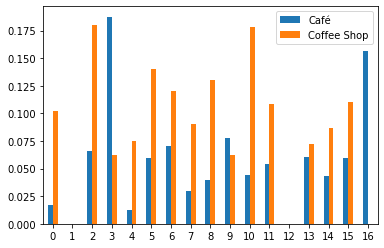

In [44]:
#bar plot
plt.figure(figsize = (15, 8))
axis = df_nei_ca_cashop.plot.bar(rot=0)
print(axis)
plt.show()

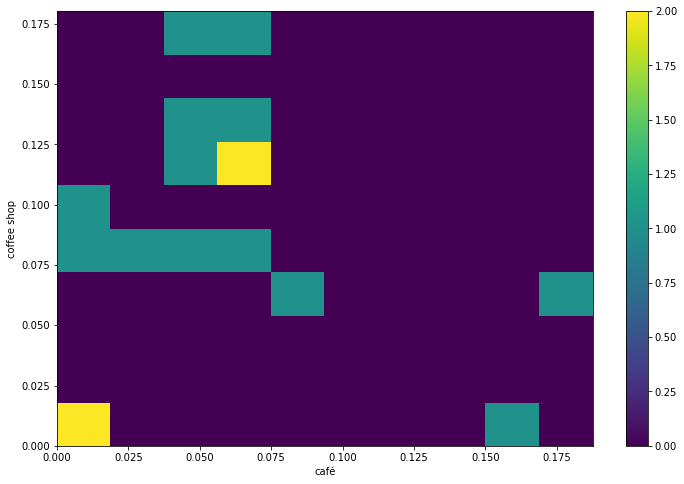

In [45]:
plt.figure(figsize = (12, 8))
plt.hist2d(cafe_coffee_shop.iloc[:, 0].values, cafe_coffee_shop.iloc[:, 1].values)
plt.xlabel("café")
plt.ylabel("coffee shop")
plt.colorbar()

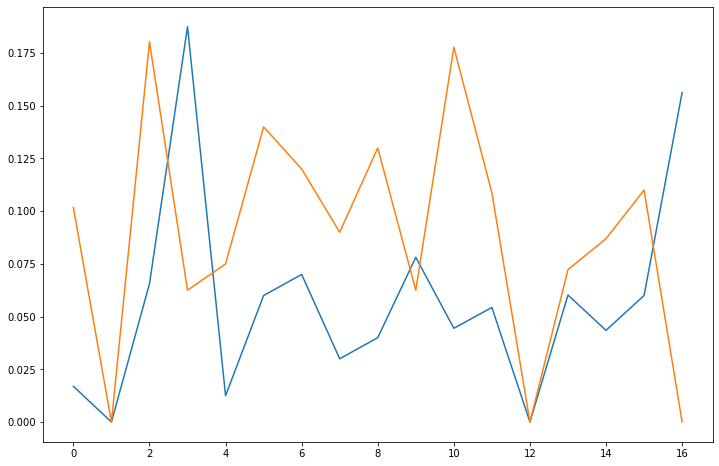

In [46]:
plt.figure(figsize = (12, 8))
plt.plot(cafe_coffee_shop)

In [47]:
# To print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in downtown_venues_grouped_neigh['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_venues_grouped_neigh[downtown_venues_grouped_neigh['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
          venue  freq
0   Coffee Shop  0.10
1  Cocktail Bar  0.07
2        Bakery  0.05
3    Restaurant  0.03
4   Cheese Shop  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.21
1     Airport Terminal  0.14
2        Boat or Ferry  0.07
3     Sculpture Garden  0.07
4  Rental Car Location  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.07
2  Italian Restaurant  0.05
3      Sandwich Place  0.05
4         Salad Place  0.03


----Christie----
           venue  freq
0  Grocery Store  0.25
1           Café  0.19
2           Park  0.12
3    Candy Store  0.06
4     Restaurant  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.08
1  Japanese Restaurant  0.06
2     Sushi Restaurant  0.06
3           Restaurant  0.04
4              Gay Bar  0.0

In [48]:
# To put that into a pandas dataframe : sort the venues in descending order before creating
# the new dataframe and display the top 10 venues for each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
downtown_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
downtown_neighborhoods_venues_sorted['Neighborhood'] = downtown_venues_grouped_neigh['Neighborhood']

for ind in np.arange(downtown_venues_grouped_neigh.shape[0]):
    downtown_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_venues_grouped_neigh.iloc[ind, :], num_top_venues)

downtown_neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue  \
0                                         Berczy Park           Coffee Shop   
1   CN Tower, King and Spadina, Railway Lands, Har...       Airport Service   
2                                  Central Bay Street           Coffee Shop   
3                                            Christie         Grocery Store   
4                                Church and Wellesley           Coffee Shop   
5                      Commerce Court, Victoria Hotel           Coffee Shop   
6              First Canadian Place, Underground city           Coffee Shop   
7                            Garden District, Ryerson           Coffee Shop   
8   Harbourfront East, Union Station, Toronto Islands           Coffee Shop   
9           Kensington Market, Chinatown, Grange Park                  Café   
10                          Regent Park, Harbourfront           Coffee Shop   
11                           Richmond, Adelaide, King           Coffee Shop   
12                                           Rosedale                  Park   
13                                     St. James Town           Coffee Shop   
14                        St. James Town, Cabbagetown           Coffee Shop   
15           Toronto Dominion Centre, Design Exchange           Coffee Shop   
16                     University of Toronto, Harbord                  Café   

   2nd Most Common Venue          3rd Most Common Venue  \
0           Cocktail Bar                         Bakery   
1       Airport Terminal               Sculpture Garden   
2                   Café                 Sandwich Place   
3                   Café                           Park   
4       Sushi Restaurant            Japanese Restaurant   
5             Restaurant                           Café   
6                   Café                          Hotel   
7         Clothing Store                 Cosmetics Shop   
8               Aquarium                          Hotel   
9            Coffee Shop  Vegetarian / Vegan Restaurant   
10                  Park                         Bakery   
11                  Café                     Restaurant   
12                 Trail                     Playground   
13                  Café                   Cocktail Bar   
14            Restaurant                         Bakery   
15                 Hotel                           Café   
16   Japanese Restaurant                        Theater   

    4th Most Common Venue 5th Most Common Venue      6th Most Common Venue  \
0                Pharmacy           Cheese Shop         Seafood Restaurant   
1                 Airport    Airport Food Court               Airport Gate   
2      Italian Restaurant                  Bank            Bubble Tea Shop   
3      Athletics & Sports            Baby Store                Coffee Shop   
4              Restaurant               Gay Bar                Yoga Studio   
5                   Hotel                   Gym         Italian Restaurant   
6              Restaurant                   Gym        Japanese Restaurant   
7         Bubble Tea Shop                  Café  Middle Eastern Restaurant   
8                    Café   Fried Chicken Joint                 Restaurant   
9   Vietnamese Restaurant          Burger Joint                Gaming Cafe   
10                Theater                   Pub                       Café   
11                  Hotel         Deli / Bodega             Clothing Store   
12           Cupcake Shop            Donut Shop           Doner Restaurant   
13     Italian Restaurant             Gastropub           Department Store   
14     Chinese Restaurant     Convenience Store                       Café   
15            Salad Place    Italian Restaurant         Seafood Restaurant   
16                    Bar                Bakery                  Bookstore   

   7th Most Common Venue    8th Most Common Venue 9th Most Common Venue  \
0         Farmers Market               Restaurant              Beer Bar   


In [49]:
downtown_neighborhoods_venues_sorted.shape

(17, 11)

#### The main characteristics of the downtown, Toronto areas

In [50]:
dnv = downtown_neighborhoods_venues_sorted
downtown_neighborhoods_venues_sorted["Downtown"]= "Downtown"

fig = px.sunburst(downtown_neighborhoods_venues_sorted,
                  path=["Downtown", "Neighborhood", "1st Most Common Venue", "2nd Most Common Venue", "3rd Most Common Venue", "4th Most Common Venue", "5th Most Common Venue", "6th Most Common Venue", "7th Most Common Venue", "8th Most Common Venue", "9th Most Common Venue", "10th Most Common Venue"],
                  title="Starbucks Store Count Distribution World Wide [Country, State, City]",
                  width=750, height=750)
fig.show()

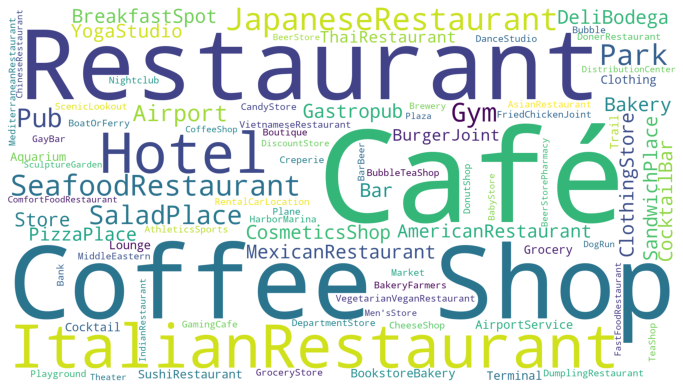

In [51]:
from wordcloud import WordCloud, STOPWORDS 

text = "Coffee Shop Airport Terminal Coffee Shop Grocery Store Coffee Shop Coffee Shop Coffee Shop Clothing Store Coffee Shop Café Coffee Shop Coffee Shop Park Coffee Shop Coffee Shop Coffee Shop Café Cocktail Bar Airport Lounge Café Café JapaneseRestaurant Restaurant Café Coffee Shop Aquarium Coffee Shop Bakery Café Trail Café Café Hotel BookstoreBakery AirportService ItalianRestaurant Park SushiRestaurant Café Hotel CosmeticsShop Hotel VegetarianVeganRestaurant Park Restaurant Playground Gastropub Restaurant Café BarBeer Bar Plane SandwichPlace AthleticsSports GayBar Hotel Restaurant Bubble TeaShop Café VietnameseRestaurant Restaurant ClothingStore DanceStudio CocktailBar Pub SaladPlace JapaneseRestaurant Restaurant Boutique SaladPlace ItalianRestaurant Restaurant ItalianRestaurant Gym Café FriedChickenJoint GroceryStore BreakfastSpot Gym DumplingRestaurant Creperie ItalianRestaurant JapaneseRestaurant BakeryFarmers Market RentalCarLocation Bank Nightclub MediterraneanRestaurant Gym JapaneseRestaurant MiddleEastern Restaurant Restaurant MexicanRestaurant Pub DeliBodega DonutShop Restaurant Bakery SeafoodRestaurant YogaStudio SeafoodRestaurant BoatOrFerry BubbleTeaShop CandyStore Hotel SeafoodRestaurant AmericanRestaurant JapaneseRestaurant PizzaPlace GamingCafe Café ThaiRestaurant DonerRestaurant DepartmentStore PizzaPlace ItalianRestaurant ItalianRestaurant CheeseShop HarborMarina BurgerJoint Restaurant YogaStudio CocktailBar AsianRestaurant ItalianRestaurant ScenicLookout ComfortFoodRestaurant Theater Hotel DogRun CosmeticsShop Park Restaurant BeerStorePharmacy SculptureGarden ThaiRestaurant BabyStore Men'sStore DeliBodega SeafoodRestaurant Hotel Brewery BurgerJoint MexicanRestaurant SeafoodRestaurant DistributionCenter ClothingStore ChineseRestaurant BreakfastSpot SandwichPlace IndianRestaurant Airport JapaneseRestaurant CoffeeShop Pub AmericanRestaurant SaladPlace FastFoodRestaurant ItalianRestaurant Park BeerStore SaladPlace DiscountStore Gym Plaza Gastropub Pub"

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", width = 1920, height = 1080).generate(text)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [52]:
brooklyn_neighborhoods_venues_sorted.shape

(70, 11)

## Let's check the frequency of "Café" and "Coffee Shop" in Downtown Neighborhood

In [53]:
dnv = downtown_neighborhoods_venues_sorted.astype(object)

In [54]:
del dnv["Downtown"] 
# We will remove the other features except "Coffee" and "Coffee Shop"
# We have used the Foursquare API which can however generate additional data to those we have used in this project.
# So our conclusion may become biased against our own basic criteria.

In [55]:
dnv["1st Most Common Venue"]=dnv["1st Most Common Venue"].replace(["Coffee Shop", "Café", "Airport Terminal", "Grocery Store", "Clothing Store", "Park", "Airport Service"],["Coffee Shop", "Café", "-", "-", "-", "-", "-"])
dnv["2nd Most Common Venue"]=dnv["2nd Most Common Venue"].replace(["Coffee Shop", "Café", "Cocktail Bar", "Airport Lounge", "Japanese Restaurant", "Restaurant", "Aquarium", "Bakery", "Trail", "Hotel", "Bookstore", "Clothing Store", "Vietnamese Restaurant", "Playground"],["Coffee Shop", "Café", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"])
dnv["3rd Most Common Venue"]=dnv["3rd Most Common Venue"].replace(["Café", "Bakery", "Airport Service", "Italian Restaurant", "Park", "Sushi Restaurant", "Hotel", "Cosmetics Shop", "Vegetarian / Vegan Restaurant", "Restaurant", "Playground", "Gastropub", "Bar", "Airport Terminal", "Sandwich Place", "Middle Eastern Restaurant", "Trail", "Pub", "Theater"],["Café", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"])
dnv["4th Most Common Venue"]=dnv["4th Most Common Venue"].replace(["Café", "Beer Bar", "Plane", "Sandwich Place", "Athletics & Sports", "Gay Bar", "Hotel", "Restaurant", "Bubble Tea Shop", "Vietnamese Restaurant", "Clothing Store", "Dance Studio", "Cocktail Bar", "Pub", "Salad Place", "Japanese Restaurant", "Bar", "Italian Restaurant", "Baby Store", "Vegetarian / Vegan Restaurant", "Breakfast Spot", "Thai Restaurant", "Deli / Bodega", "Gastropub", "Bar"],["Café", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-","-", "-", "-"])
dnv["5th Most Common Venue"]=dnv["5th Most Common Venue"].replace(["Café", "Restaurant", "Boutique", "Salad Place", "Italian Restaurant", "Gym", "Fried Chicken Joint", "Grocery Store", "Breakfast Spot", "Dumpling Restaurant", "Creperie", "Japanese Restaurant", "Bakery", "Farmers Market", "Boat or Ferry", "Burger Joint", "Gay Bar", "Bar", "Hotel", "Eastern European Restaurant", "Cheese Shop"],["Café", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"])
dnv["6th Most Common Venue"]=dnv["6th Most Common Venue"].replace(["Farmers Market", "Rental Car Location", "Bank", "Nightclub", "Mediterranean Restaurant", "Gym", "Japanese Restaurant", "Middle Eastern Restaurant", "Restaurant", "Mexican Restaurant", "Pub", "Deli / Bodega", "Donut Shop", "Bakery", "Seafood Restaurant", "Yoga Studio", "Pharmacy", "Airport", "Candy Store", "Brewery", "Burger Joint", "Dumpling Restaurant", "Italian Restaurant"],["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-","-", "-", "-"])
dnv["7th Most Common Venue"]=dnv["7th Most Common Venue"].replace(["Café", "Seafood Restaurant", "Boat or Ferry", "Bubble Tea Shop", "Candy Store", "Hotel", "American Restaurant", "Japanese Restaurant", "Pizza Place", "Gaming Cafe", "Thai Restaurant", "Doner Restaurant", "Department Store", "Italian Restaurant", "Restaurant", "Airport Food Court", "Nightclub", "Men's Store", "Cocktail Bar", "Steakhouse", "Park", "Clothing Store", "Donut Shop"],["Café", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-","-", "-", "-"])
dnv["8th Most Common Venue"]=dnv["8th Most Common Venue"].replace(["Cheese Shop", "Harbor / Marina", "Burger Joint", "Restaurant", "Yoga Studio", "Cocktail Bar", "Asian Restaurant", "Italian Restaurant", "Scenic Lookout", "Comfort Food Restaurant", "Theater", "Hotel", "Dog Run", "Cosmetics Shop", "Park", "Beer Store", "Salad Place", "Mediterranean Restaurant", "American Restaurant", "Pizza Place", "Dessert Shop", "Gym", "Doner Restaurant", "Seafood Restaurant", "Beer Bar"],["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-","-", "-", "-"])
dnv["9th Most Common Venue"]=dnv["9th Most Common Venue"].replace(["Pharmacy", "Sculpture Garden", "Thai Restaurant", "Baby Store", "Men's Store", "Deli / Bodega", "Seafood Restaurant", "Hotel", "Brewery", "Burger Joint", "Mexican Restaurant", "Distribution Center", "Clothing Store", "Chinese Restaurant", "Breakfast Spot", "Sandwich Place", "Rental Car Location", "Bank", "Restaurant", "Cosmetics Shop", "Fried Chicken Joint", "Grocery Store", "Yoga Studio", "Asian Restaurant", "Comfort Food Restaurant", "Bookstore", "Dog Run", "Park"],["-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-","-", "-", "-","-", "-", "-"])
dnv["10th Most Common Venue"]=dnv["10th Most Common Venue"].replace(["Coffee Shop", "Indian Restaurant", "Airport", "Japanese Restaurant", "Pub", "American Restaurant", "Salad Place", "Fast Food Restaurant", "Italian Restaurant", "Park", "Beer Store", "Discount Store", "Gym", "Plaza", "Gastropub", "Basketball Stadium", "Sculpture Garden", "Bubble Tea Shop", "Dog Run", "Asian Restaurant", "Electronics Store", "Scenic Lookout", "Arts & Crafts Store", "Mexican Restaurant", "Sushi Restaurant", "Distribution Center", "Butcher", "Sporting Goods Shop", "Sandwich Place"],["Coffee Shop", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-","-", "-", "-"])
dnv

Neighborhood 1st Most Common Venue  \
0                                         Berczy Park           Coffee Shop   
1   CN Tower, King and Spadina, Railway Lands, Har...                     -   
2                                  Central Bay Street           Coffee Shop   
3                                            Christie                     -   
4                                Church and Wellesley           Coffee Shop   
5                      Commerce Court, Victoria Hotel           Coffee Shop   
6              First Canadian Place, Underground city           Coffee Shop   
7                            Garden District, Ryerson           Coffee Shop   
8   Harbourfront East, Union Station, Toronto Islands           Coffee Shop   
9           Kensington Market, Chinatown, Grange Park                  Café   
10                          Regent Park, Harbourfront           Coffee Shop   
11                           Richmond, Adelaide, King           Coffee Shop   
12                                           Rosedale                     -   
13                                     St. James Town           Coffee Shop   
14                        St. James Town, Cabbagetown           Coffee Shop   
15           Toronto Dominion Centre, Design Exchange           Coffee Shop   
16                     University of Toronto, Harbord                  Café   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0                      -                     -              Pharmacy   
1       Airport Terminal      Sculpture Garden               Airport   
2                   Café                     -                     -   
3                   Café                     -                     -   
4       Sushi Restaurant   Japanese Restaurant                     -   
5                      -                  Café                     -   
6                   Café                     -                     -   
7                      -                     -                     -   
8                      -                     -                  Café   
9            Coffee Shop                     -                     -   
10                  Park                     -               Theater   
11                  Café                     -                     -   
12                     -                     -          Cupcake Shop   
13                  Café          Cocktail Bar                     -   
14                     -                     -    Chinese Restaurant   
15                     -                  Café                     -   
16                     -                     -                     -   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                      -                     -        Farmers Market   
1     Airport Food Court          Airport Gate        Airport Lounge   
2                   Bank       Bubble Tea Shop          Burger Joint   
3             Baby Store           Coffee Shop                     -   
4                      -                     -                     -   
5                      -                     -         Deli / Bodega   
6                      -                     -         Deli / Bodega   
7                   Café                     -                     -   
8                      -                     -                     -   
9                      -           Gaming Cafe        Farmers Market   
10                   Pub                  Café        Breakfast Spot   
11         Deli / Bodega        Clothing Store                   Gym   
12            Donut Shop      Doner Restaurant               Dog Run   
13             Gastropub      Department Store                     -   
14     Convenience Store                  Café                     -   
15                     -                     -                     -   
16                     -             Bookstore         Poutine Place   

   8th Most Common Venue

### Results


We can see that "Coffee" is LESS frequented in the following neighborhoods: "Berczy Park", "CN Tower", "King and Spadina", "Railway", "Lands", "Rosedale", "Church and Wellesley", "Regent Park" and "Harbourfront".​

So we'd better choose a coffee corner in one of these neighborhoods where "Coffee" is not among the 10 most frequented places. But before making a choice, we will first check the frequency of "Coffee Shop" in the neighborhood to choose.​

"Coffee Shop" is less frequent in neighborhoods like ("CN Tower", "King and Spadina", "Railway", "Lands", "Rosedale", "University of Toronto" and "Harbord"). We can afford to eliminate the neighborhoods where "Coffee" and "Coffee Shop" are less frequent. This operation therefore consists of eliminating the following neighborhoods: ["CN Tower", "King and Spadina", "Railway", "Lands", "Rosedale"].​

We can also see that "Coffee Shop" is MORE frequent in almost all neighborhoods, except those mentioned in parentheses. The high frequency of "Coffee Shop" would put them in competition. Competition that would make the price of ingredients affordable.​

The second operation is to look at the other neighborhoods that remain in parentheses, presenting those where "Coffee Shop" is LESS frequent after eliminating the neighborhoods listed in parentheses. From this new list of neighborhoods, we must choose "Berczy Park", "Church and Wellesley", "Regent Park" and "Harbourfront".​

Our choice should be the neighborhood with a low frequency of "Coffee" and a high frequency of "Coffee Shop". We can afford to eliminate "Regent Park" and "Harbourfront" which have a higher frequency of "Coffee Shop" (we have "Coffee Shop" as the 7th most frequent place on its line while "Berczy Park", "Church and Wellesley" have nothing until the 10th most frequent place.​

The "Berczy Park" neighborhood seems to be one of the best candidates for the coffee corner location. But after consulting the map, it seems that the area is not favorable for the location of the restaurant "Café". It would be better to choose the location of the restaurant "Café" in the area of "Church and Wellesley".​

#### The battle for these neighborhoods is not over. Let's regulate the following code output at the level of each neighborhood: :

In [56]:
# print the frequency value of the 10 most remarkable places
num_top_venues = 10

for hood in downtown_venues_grouped_neigh['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_venues_grouped_neigh[downtown_venues_grouped_neigh['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.10
1        Cocktail Bar  0.07
2              Bakery  0.05
3          Restaurant  0.03
4         Cheese Shop  0.03
5            Pharmacy  0.03
6            Beer Bar  0.03
7  Seafood Restaurant  0.03
8      Farmers Market  0.03
9   Indian Restaurant  0.02


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
                 venue  freq
0      Airport Service  0.21
1     Airport Terminal  0.14
2        Boat or Ferry  0.07
3     Sculpture Garden  0.07
4  Rental Car Location  0.07
5              Airport  0.07
6   Airport Food Court  0.07
7         Airport Gate  0.07
8       Airport Lounge  0.07
9                Plane  0.07


----Central Bay Street----
                 venue  freq
0          Coffee Shop  0.18
1                 Café  0.07
2   Italian Restaurant  0.05
3       Sandwich Place  0.05
4          Salad Place  0.03
5                 Bank  0.03
6   

| Neighborhood         | Venues      | Frequence     | Hight frequence |
|----------------------|-------------|---------------|-----------------|
| Berczy Park          | Coffee Shop | 0.10          |  0.10           |
|----------------------|-------------|---------------|-----------------|
| Church and Wellesley | Coffee Shop | 0.08          |                 |           


####   The neighborhood "Berczy Park" seems to be one of the best candidates for the location of the coffee corner

In [57]:
address = 'Church and Wellesley'

geolocator = Nominatim(user_agent="Church and Wellesley_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))

map_downtown = folium.Map(location = [43.6541737, -79.38081162653639], zoom_start = 10)
folium.Marker(location = [43.64798435, -79.37539591138858], tooltip = "Clic for more", popup = "Berczy Park").add_to(map_downtown)
folium.Marker(location = [43.6655242, -79.3838011], tooltip = "Clic for more", popup = "Church and Wellesley").add_to(map_downtown)
map_downtown

The geograpical coordinate are 43.6655242, -79.3838011.


## To check the frequency of "Café" and "Coffee Shop" in Brooklyn Neighborhood 

Here also it is enough to do the same or more advanced operations done on Downtown to arrive at a conclusion.

In this case we can afford to choose the best neighborhood among the two best identified (Downtown, Toronto and Brooklyn, New York)

Since "Downtown, Toronto" is the business district of the city of Toronto in Canada, I gave priority to "Downtown" since it is about business.

#### Conclusion : Like other factors and/or criteria that may come into play in the choice of the coffee place, it would be best to choose "Church and Wellesley" as the location of our coffee place.

### NB : If other factors and or criteria are added, the choice may be another TORONTO or New York

## THANK YOU FOR READING THIS PROJECT "The Battle of Neighborhoods" TO THE END !!!